<a href="https://colab.research.google.com/github/amirAHS2000/nn_and_dl/blob/master/makemore_part2_mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# read in all the words
words = open('/content/drive/MyDrive/nn_zero_to_hero_course/data/names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [5]:
len(words)

32033

In [7]:
# build the vocabulary of characters and mappings to/from integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i, s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s, i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [11]:
# build the dataset
block_size = 3 # context length: how many characters do we take to predict the next one?

def build_dataset(words):
  X, Y = [], []
  for w in words:

    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      context = context[1:] + [ix] # crop and append

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

In [15]:
import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8 * len(words))
n2 = int(0.9 * len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182757, 3]) torch.Size([182757])
torch.Size([22742, 3]) torch.Size([22742])
torch.Size([22647, 3]) torch.Size([22647])


In [16]:
Xtr.shape, Ytr.shape # dataset

(torch.Size([182757, 3]), torch.Size([182757]))

In [17]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 10), generator=g)
W1 = torch.randn((30, 200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [20]:
sum(p.nelement() for p in parameters) # number of parameters in total

11897

In [21]:
for p in parameters:
  p.requires_grad = True

In [22]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10 ** lre

In [23]:
lri = []
lossi = []
stepi = []

In [25]:
for i in range(200000):

  # mini-batch construct
  idx = torch.randint(0, Xtr.shape[0], (32,))

  # forward pass
  emb = C[Xtr[idx]] # (32, 3, 10)
  h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 200)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Ytr[idx])

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  # lr = lrs[i]
  lr = 0.1 if i < 100000 else 0.01
  for p in parameters:
    p.data += -lr * p.grad

  # track stats
  # lri.append(lre[i])
  stepi.append(i)
  lossi.append(loss.log10().item())

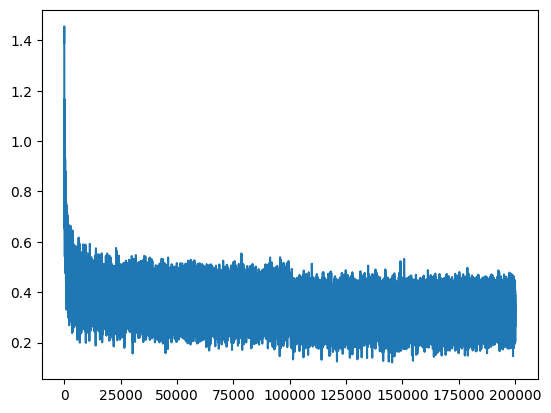

In [26]:
plt.plot(stepi, lossi)

In [27]:
print(loss.item())

2.249612331390381


In [28]:
Xdev.shape, Ydev.shape

(torch.Size([22742, 3]), torch.Size([22742]))

In [30]:
emb = C[Xdev]
# print(emb.shape)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)
loss

torch.Size([22742, 3, 10])


tensor(2.1639, grad_fn=<NllLossBackward0>)

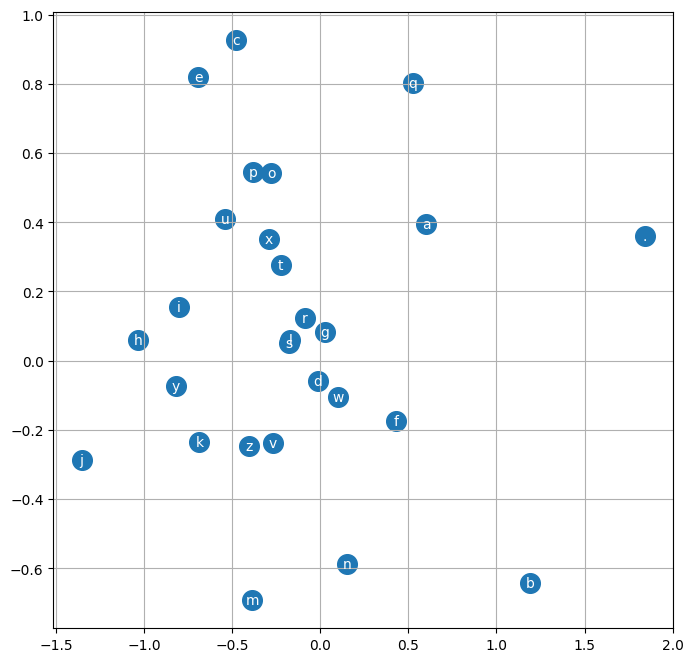

In [31]:
# visualize dimensions 0 and 1 of the embedding matrix for all characters
plt.figure(figsize=(8, 8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
  plt.text(C[i, 0].item(), C[i, 1].item(), itos[i], ha="center", va="center", color="white")
plt.grid('minor')

In [32]:
# sample from the model
g = torch.Generator().manual_seed(2147483647 + 10)

num_of_samples = 20

for _ in range(num_of_samples):

  out = []
  context = [0] * block_size # initialize with all ...

  while True:
    emb = C[torch.tensor([context])] # (1, block_size, d)
    h = torch.tanh(emb.view(1, -1) @ W1 + b1)
    logits = h @ W2 + b2
    probs = F.softmax(logits, dim=1)
    idx = torch.multinomial(probs, num_samples=1, generator=g).item()
    context = context[1:] + [idx]
    out.append(idx)
    if idx == 0:
      break

  print(''.join(itos[i] for i in out))

mora.
mayah.
keel.
nihah.
marethan.
endraeg.
aderedielin.
mayanelle.
elieananar.
katelor.
kamin.
shabergian.
jest.
jairenlynn.
nophian.
brence.
ryyah.
fael.
yuma.
myston.
